In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations_JB import *
from proj1_helpers import *
%load_ext autoreload
%autoreload 2

The code below is to prepare the data before making any regression on it
We first split it in 4 batches according to the value of the feature PRI_jet_num
Then we remove unusual features ( value -999) if needed
To optimize the regression on the angles, we split those kinf of feature in 2 by using cosinus and sinus

In [120]:
def feature0_split(yb, input_data, ids):
    """
    Splitting the data according to the first feature (if its undefined or not)
    """
    feature0 = input_data[:,0]
    mask = np.where(feature0==-999,False,True)
    return yb[mask], input_data[mask], ids[mask], yb[np.invert(mask)], input_data[np.invert(mask)], ids[np.invert(mask)]

def features_split(yb, input_data, ids):
    """
    Splitting the data according to the value of PRI_jet_num
    """
    
    mask_0 = (input_data[:,22] == 0)
    mask_1 = (input_data[:,22] == 1)
    mask_2 = (input_data[:,22] == 2)
    mask_3 = (input_data[:,22] == 3)

    
    return yb[mask_0], yb[mask_1], yb[mask_2], yb[mask_3], \
input_data[mask_0], input_data[mask_1], input_data[mask_2], input_data[mask_3], \
ids[mask_0], ids[mask_1], ids[mask_2], ids[mask_3]

def remove_features_0(input_data_0):
    """
    Remove the useless features if the jet num feature is equal to 0
    """
    useless_features_index = [4, 5, 6, 12,22, 23, 24, 25 , 26, 27, 28,29,33,34]# , 30, 33]
    
    mask = np.ones(int(input_data_0.shape[1]), dtype=bool)
    mask[(useless_features_index)] = False
    return input_data_0[:,mask]


def remove_features_1(input_data_1):
    """
    Remove the useless features if the jet num feature is equal to 1
    """
    print input_data.shape
    useless_features_index = [4, 5, 6, 12,22, 26, 27, 28,34]#, 30, 33]
    # feature 31 : toujours la meme valeur ?
    mask = np.ones(int(input_data_1.shape[1]), dtype=bool)
    mask[(useless_features_index)] = False
    return input_data_1[:,mask]
    
    # No need for jet_num equal to 2 or 3 : all the features are kept   

def angle_features_processing(data_path):
    """
    We want to change all the features representing an angle into two features
    one for cosinus of the angle and another for sinus of the angle.
    """
    
    yb, input_data, ids = load_csv_data(data_path,sub_sample = False)

    angle_features = [15, 18, 20, 25, 28]
    
    new_data = np.zeros((input_data.shape[0], input_data.shape[1] + len(angle_features) ))
    
    for k in range(input_data.shape[1]):
        if k not in angle_features:
            new_data[:, k] = input_data[:, k]
        
    for idx, column in enumerate(angle_features): 
        
        new_data[:, column] = np.cos(input_data[:, column])
        new_data[:, input_data.shape[1] + idx] = np.sin(input_data[:, column])
    
    return yb, new_data, ids

def preparing_features(train_path, test_path):
    
    """ 
    Returns 2 arrays :
    The first one contains the splitted train data
    The second one contains the splitted test data
    """
    
    yb, input_data, ids =  angle_features_processing("train.csv")
    ybt, input_datat, idst = angle_features_processing("test.csv")
    
    yb_def_feat0, input_data_def_feat0, ids_def_feat0, yb_undef_feat0, input_data_undef_feat0, ids_undef_feat0 = feature0_split(yb, input_data, ids)
    ybt_def_feat0, input_datat_def_feat0, idst_def_feat0, ybt_undef_feat0, input_datat_undef_feat0, idst_undef_feat0 = feature0_split(ybt, input_datat, idst)
    
    yb0, yb1, yb2, yb3, data0, data1, data2, data3, ids0, ids1, ids2, ids3 = features_split(yb_def_feat0, input_data_def_feat0, ids_def_feat0)
    yb0_u, yb1_u, yb2_u, yb3_u, data0_u, data1_u, data2_u, data3_u, ids0_u, ids1_u, ids2_u, ids3_u = features_split(yb_undef_feat0, input_data_undef_feat0, ids_undef_feat0)
    yb0t, yb1t, yb2t, yb3t, data0t, data1t, data2t, data3t, ids0t, ids1t, ids2t, ids3t = features_split(ybt_def_feat0, input_datat_def_feat0, idst_def_feat0)
    yb0t_u, yb1t_u, yb2t_u, yb3t_u, data0t_u, data1t_u, data2t_u, data3t_u, ids0t_u, ids1t_u, ids2t_u, ids3t_u = features_split(ybt_undef_feat0, input_datat_undef_feat0, idst_undef_feat0)
    
    data0, data1, data0_u, data1_u = remove_features_0(data0), remove_features_1(data1), remove_features_0(data0_u), remove_features_1(data1_u)
    data0t, data1t, data0t_u, data1t_u = remove_features_0(data0t), remove_features_1(data1t), remove_features_0(data0t_u), remove_features_1(data1t_u)

    data0, data1, data2, data3 = standardize(data0), standardize(data1), standardize(data2), standardize(data3)
    data0t, data1t, data2t, data3t = standardize(data0t), standardize(data1t), standardize(data2t), standardize(data3t)
    
    return np.array([yb0, yb1, yb2, yb3,yb0_u, yb1_u, yb2_u, yb3_u, data0, data1, data2, data3, data0_u, data1_u, data2_u, data3_u, ids0, ids1, ids2, ids3, ids0_u, ids1_u, ids2_u, ids3_u]), np.array([yb0t, yb1t, yb2t, yb3t, yb0t_u, yb1t_u, yb2t_u, yb3t_u, data0t, data1t, data2t, data3t, data0t_u, data1t_u, data2t_u, data3t_u, ids0t, ids1t, ids2t, ids3t, ids0t_u, ids1t_u, ids2t_u, ids3t_u])

In [121]:
train_array, test_array = preparing_features("train.csv", "test.csv")

(250000L, 35L)
(250000L, 35L)
(250000L, 35L)
(250000L, 35L)


In [22]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly = np.ones((len(x), 1))
    for deg in range(1, degree+1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly

In [25]:
def ridge(yb_test, input_data_test, yb_train, input_data_train,lambda_):
    
    w, train_loss = ridge_regression(yb_train, input_data_train, lambda_)
    
    #w, train_loss = least_squares_GD_adapt_step(yb_train, input_data_train, 0*np.random.rand(int(input_data_train.shape[1])), 1000, 0.00000000001,computeLoss = True);
    
    test_loss = compute_loss(yb_test, input_data_test, w)
    y_pred = predict_labels(w, input_data_test)
    return w, train_loss, test_loss, y_pred 

7.635222447080611e-17
1.0


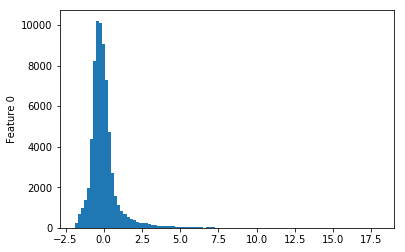

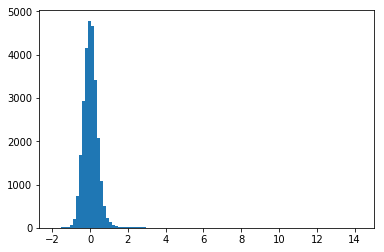

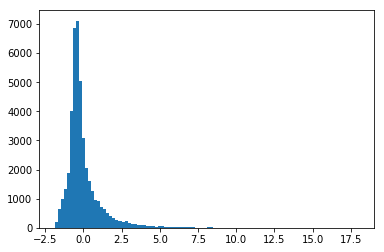

-1.121930957981925e-16
1.0


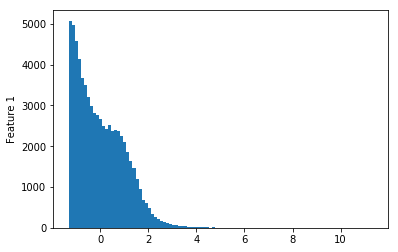

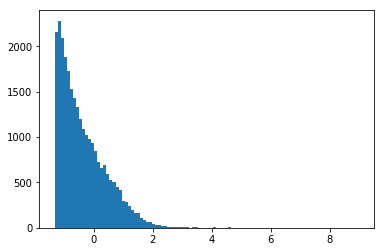

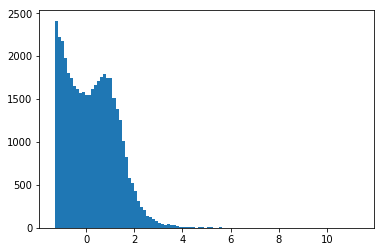

1.1554365884012946e-16
1.0


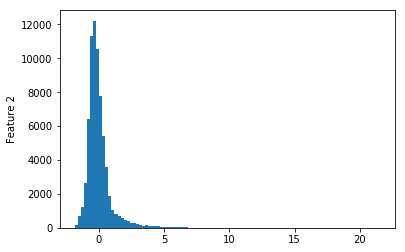

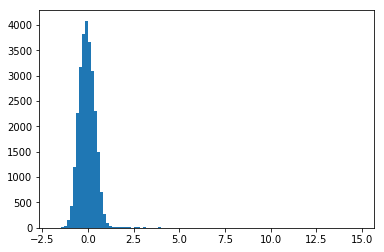

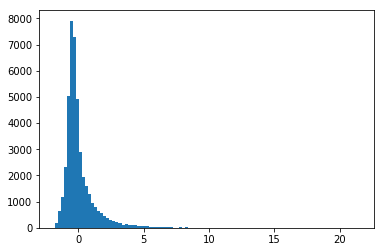

2.800258445352171e-16
1.0


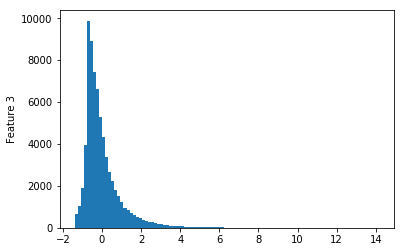

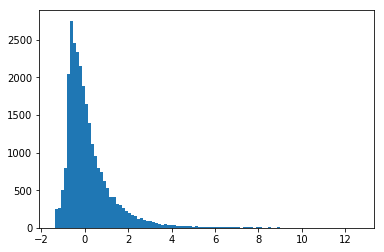

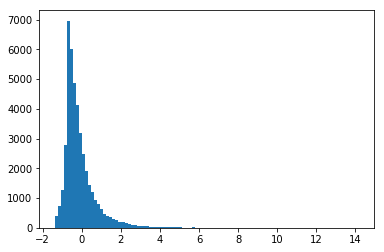

-4.6491600512210265e-16
0.9999999999999999


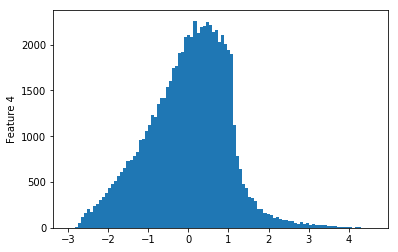

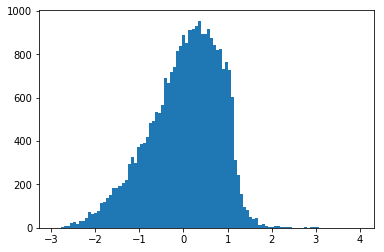

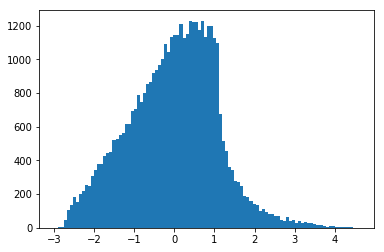

3.858224108897117e-17
1.0


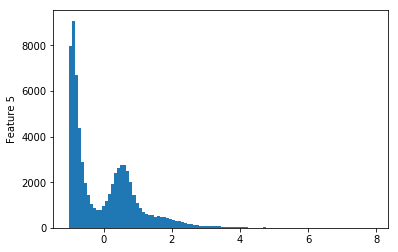

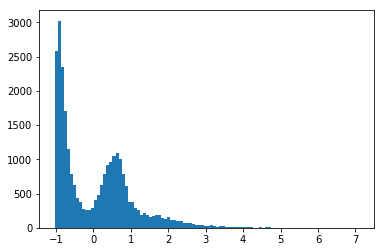

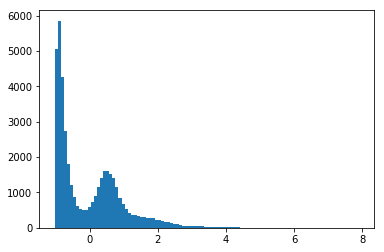

-2.743400405852635e-16
1.0


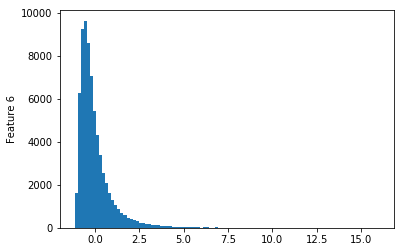

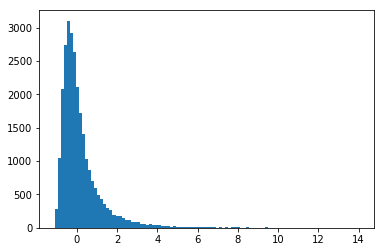

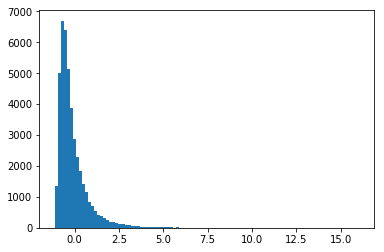

-1.5148606238090788e-16
1.0


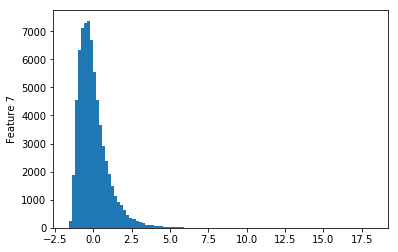

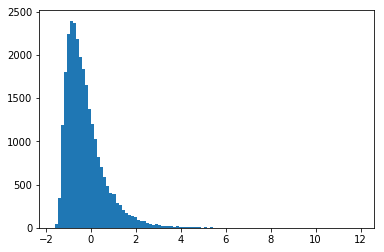

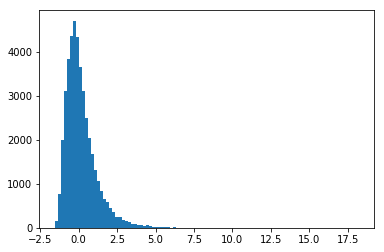

5.675650728614444e-17
0.9999999999999999


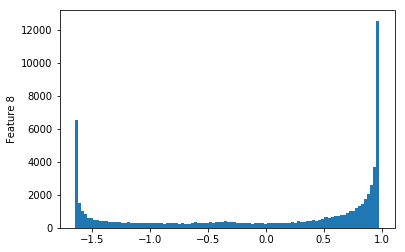

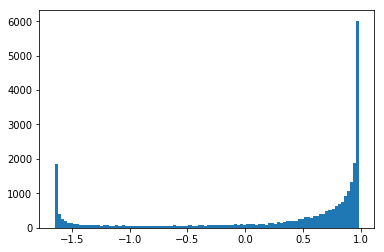

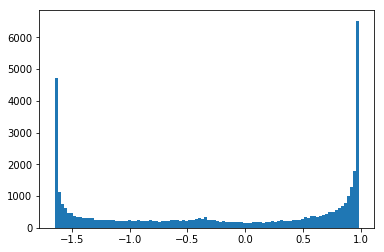

8.488093039573659e-17
1.0


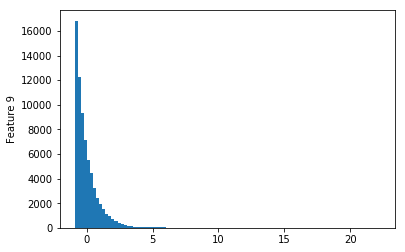

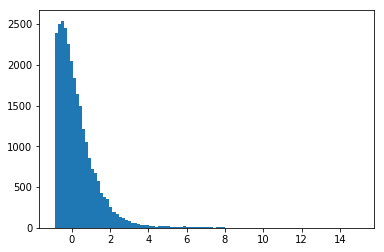

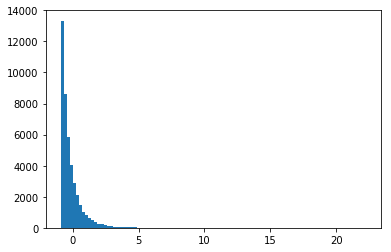

-8.18349639939757e-17
1.0


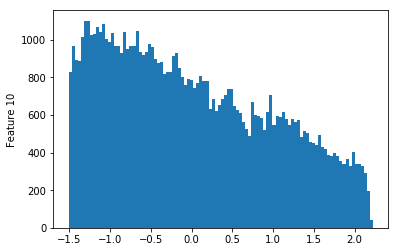

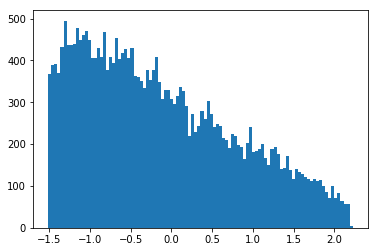

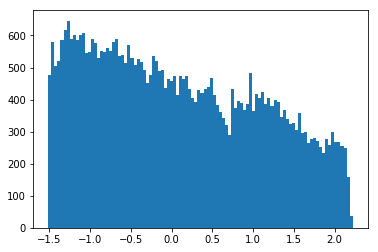

1.059996307812787e-16
0.9999999999999999


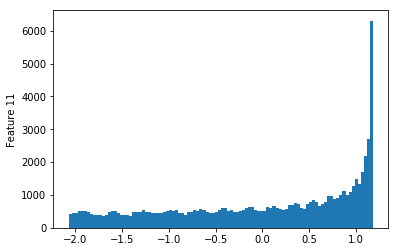

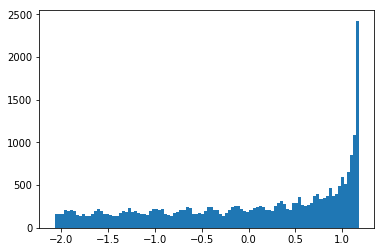

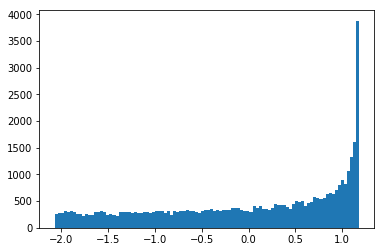

-3.273398559759028e-16
0.9999999999999999


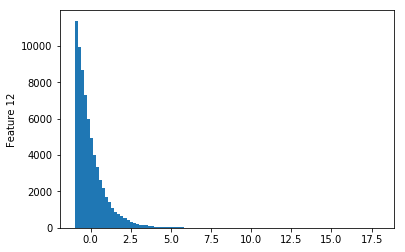

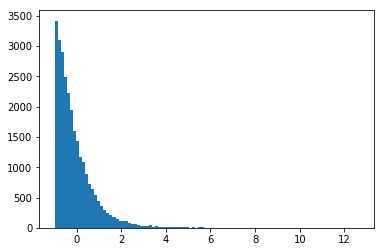

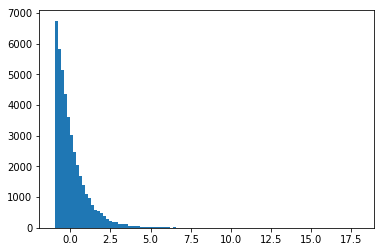

7.107254937442059e-18
1.0


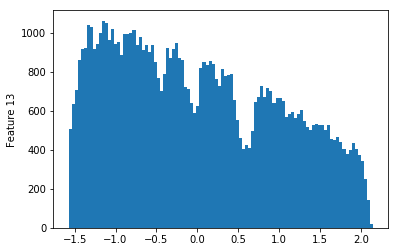

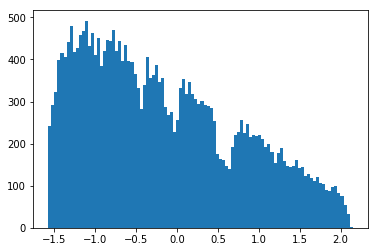

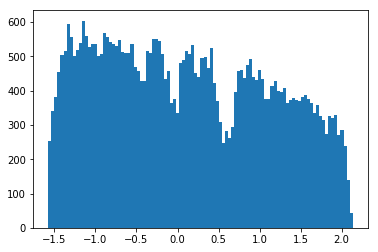

2.6601439908711705e-16
0.9999999999999998


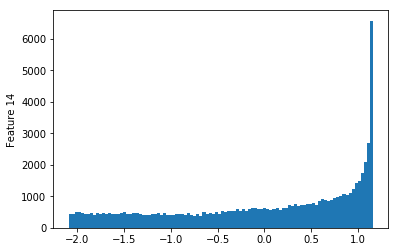

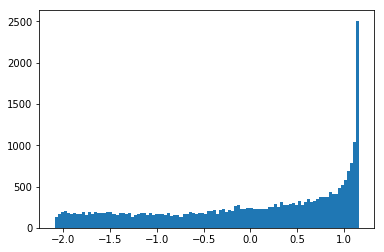

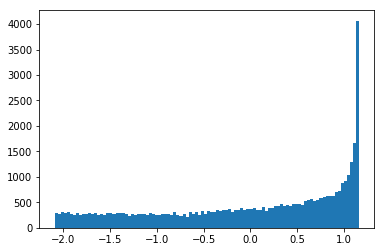

8.107347239353548e-17
1.0


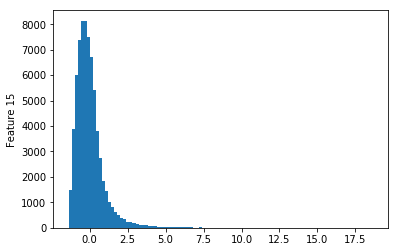

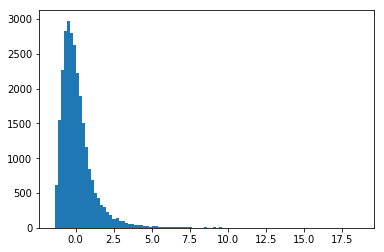

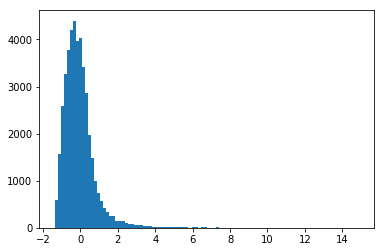

-6.904190510658e-18
1.0


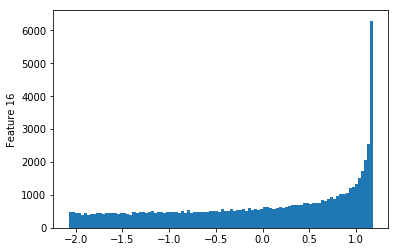

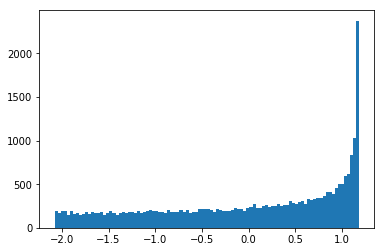

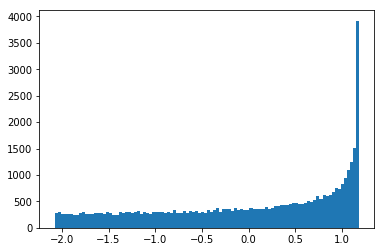

-1.4620638728452233e-17
1.0


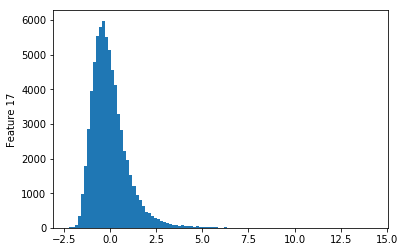

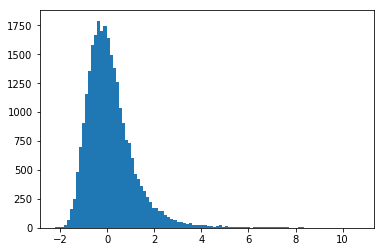

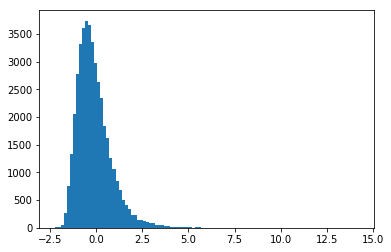

-3.2997969352409557e-16
1.0


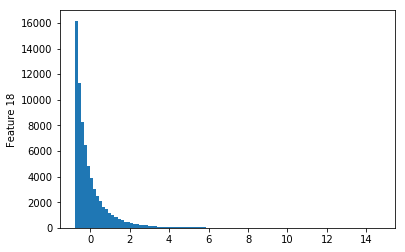

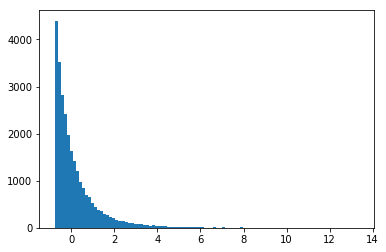

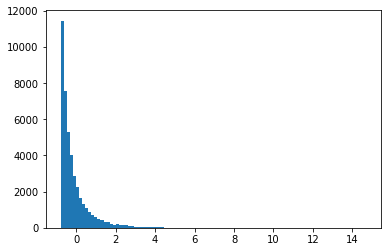

2.8434096360437837e-16
0.9999999999999999


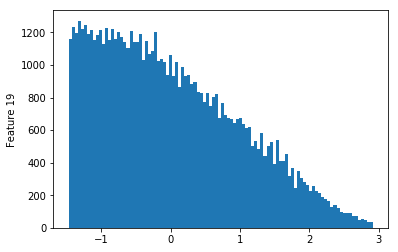

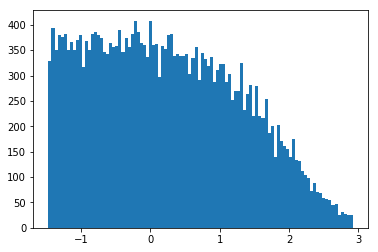

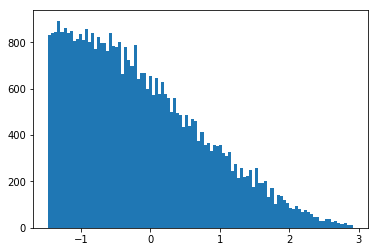

-1.9280967323146384e-16
1.0


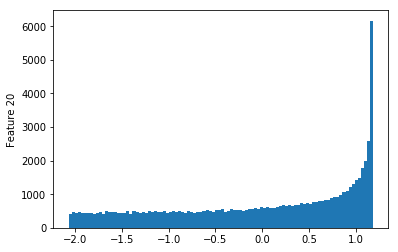

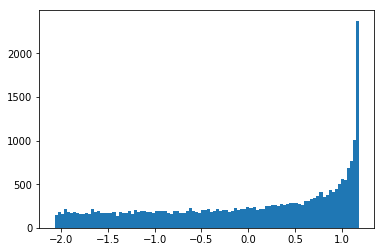

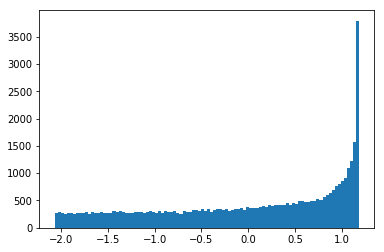

2.154513568178864e-16
1.0


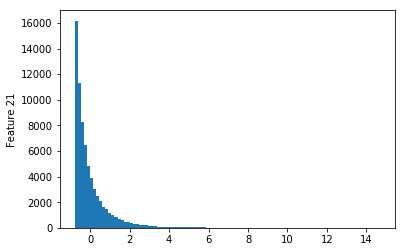

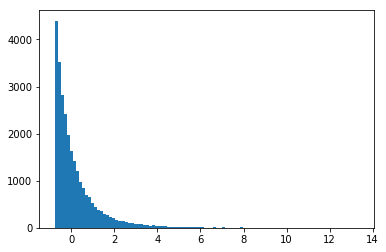

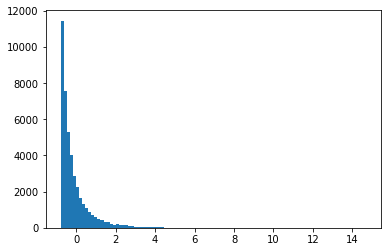

7.432158020296552e-17
1.0


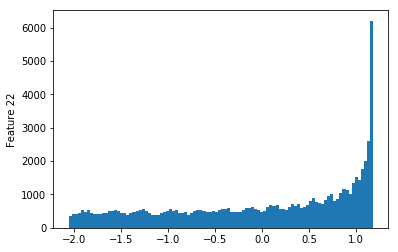

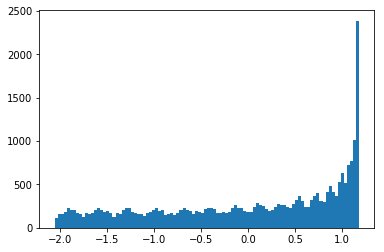

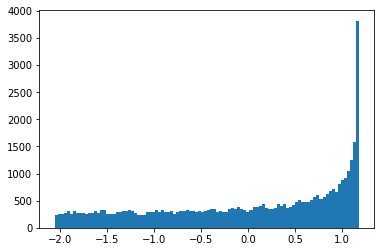

1.3625623037210345e-16
1.0


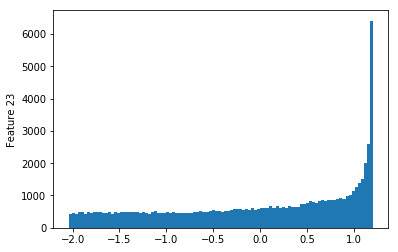

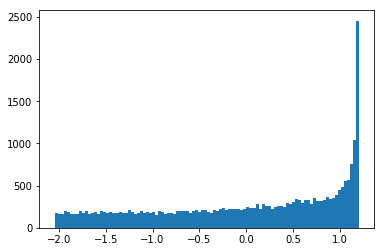

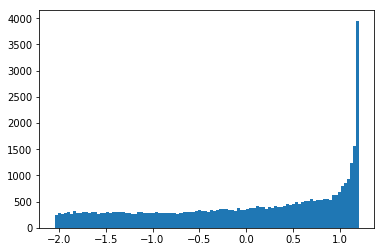

4.528336717284511e-17
1.0


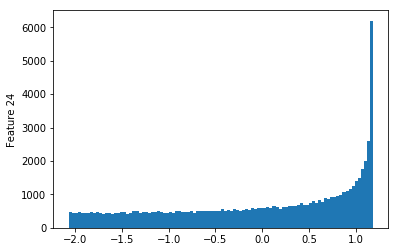

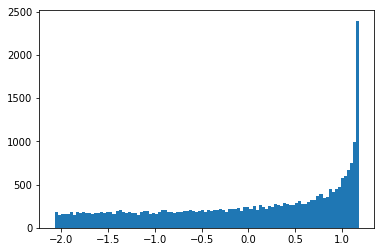

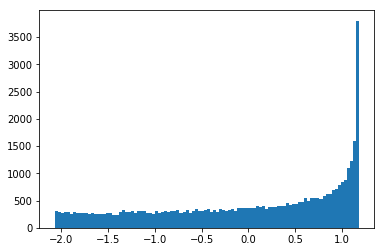

-1.0716725123528704e-16
0.9999999999999999


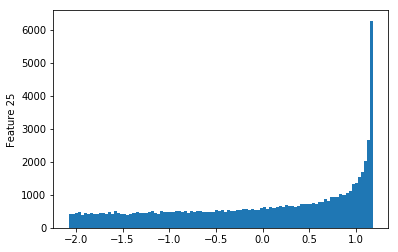

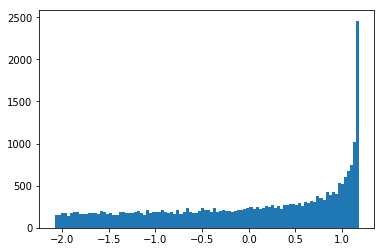

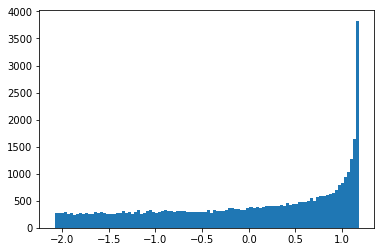

IndexError: index 26 is out of bounds for axis 1 with size 26

In [187]:
def histo(index_feature, yb, data,bins):
    
    data_array = data[:,index_feature]
    data_mask = np.where(yb>0, True, False) # Transforming in a boolean mask
    
    print np.mean(data_array)
    print np.std(data_array)
    
    plt.hist(data_array,bins)
    plt.ylabel("Feature "+str(i))
    plt.figure()
    plt.hist(data_array[data_mask],bins)
    plt.figure()
    plt.hist(data_array[np.invert(data_mask)],bins)
    plt.show()
    
for i in range(36):    
    #histo(i,y, standardize(x),100)
    histo(i,data_list[1][0],standardize(data_list[1][1]),100)

In [194]:
""" 
Générateur renvoyant (en k fois) des données splitées pour train et test
Retourne les données de train puis de test
"""
def K_split_LS(yb,input_data,k):
    n = int(yb.shape[0])
    bool_mask = np.ones(n,dtype=bool)
    bool_mask[::k] = 0
    """On renvoie ... train puis ... test"""
    for i in range(k):
        yield yb[bool_mask], standardize(input_data[bool_mask]), yb[np.invert(bool_mask)], standardize(input_data[np.invert(bool_mask)])
        bool_mask[i::k] = 1
        bool_mask[i+1::k] = 0 
        
def Kfold_ridge(yb, input_data, k,degree,lambda_):

    train_loss_list = []
    test_loss_list = []
    score_list = []
    for yb_train, input_data_train, yb_test, input_data_test, in K_split_LS(yb, input_data,k):
        input_data_train_poly = build_poly(input_data_train,degree)
        input_data_test_poly = build_poly(input_data_test,degree)
        w, train_loss, test_loss, y_pred = ridge(yb_test, input_data_test_poly, yb_train, input_data_train_poly,lambda_)
        train_loss_list+=[train_loss]
        test_loss_list+=[test_loss]
        score_list+=[np.mean(y_pred == yb_test)]
        
    return train_loss_list, test_loss_list,score_list  

def param_test_simultane(yb, input_data, k):
    
    #lambda_list = np.linspace(10,max_lambda,number_lambda)
    lambda_list = np.logspace(-10, 1, 13)
    degree_list = np.arange(4,15)
    
    final_train_loss_list = np.zeros((len(degree_list),len(lambda_list)))
    final_test_loss_list = np.zeros((len(degree_list),len(lambda_list)))
    final_score_list = np.zeros((len(degree_list),len(lambda_list)))

    
    for j,degree in enumerate(degree_list):
        for i, lambda_ in enumerate(lambda_list):
            train_loss_list, test_loss_list,score_list = Kfold_ridge(yb, input_data,k,degree,lambda_)
            train_loss, test_loss, score = np.mean(train_loss_list), np.mean(test_loss_list), np.mean(score_list)
            final_train_loss_list[j,i]=train_loss
            final_test_loss_list[j,i]=test_loss
            final_score_list[j,i]=score
            print ("Degree = " + str(degree) + " and Lambda = " + str(lambda_) + "Score = " + str(score))
    
    """
    plt.legend()
    plt.figure(1)
    #plt.contourf(lambda_list,degree_list, final_train_loss_list, 20, cmap='RdGy')
    plt.pcolor(lambda_list,degree_list, final_train_loss_list)
    plt.colorbar();
    
    plt.ylabel("Train Loss")
    plt.figure(2)
    plt.contourf(lambda_list,degree_list,  final_test_loss_list, 20, cmap='RdGy')
    plt.colorbar();
    plt.ylabel("Test Loss")
    plt.figure(3)
    plt.contourf(lambda_list,degree_list,  final_score_list, 20, cmap='RdGy')
    plt.colorbar();
    plt.ylabel("Score")
    """
    plt.show()
    
    return final_train_loss_list, final_test_loss_list, final_score_list

for i in range(8):
    param_test_simultane(data_list[i][0], data_list[i][1],6)

Degree = 4 and Lambda = 1e-10Score = 0.7155696328572928
Degree = 4 and Lambda = 8.254041852680173e-10Score = 0.7900390928841908
Degree = 4 and Lambda = 6.812920690579622e-09Score = 0.7988616381126077
Degree = 4 and Lambda = 5.6234132519034905e-08Score = 0.7987938885379026
Degree = 4 and Lambda = 4.6415888336127725e-07Score = 0.7989158540805773
Degree = 4 and Lambda = 3.831186849557285e-06Score = 0.7989158529786714
Degree = 4 and Lambda = 3.1622776601683795e-05Score = 0.7988209888085468
Degree = 4 and Lambda = 0.0002610157215682533Score = 0.7987261268422339
Degree = 4 and Lambda = 0.002154434690031882Score = 0.7985906089604254
Degree = 4 and Lambda = 0.01778279410038923Score = 0.7965849222715445
Degree = 4 and Lambda = 0.14677992676220675Score = 0.7933866165160257
Degree = 4 and Lambda = 1.2115276586285852Score = 0.7786148963300822
Degree = 4 and Lambda = 10.0Score = 0.7293264295057785
Degree = 5 and Lambda = 1e-10Score = 0.7050125380789436
Degree = 5 and Lambda = 8.254041852680173e-10S

Degree = 13 and Lambda = 6.812920690579622e-09Score = 0.7491654011389025
Degree = 13 and Lambda = 5.6234132519034905e-08Score = 0.7768932357720063
Degree = 13 and Lambda = 4.6415888336127725e-07Score = 0.7683686877377233
Degree = 13 and Lambda = 3.831186849557285e-06Score = 0.8020191920868286
Degree = 13 and Lambda = 3.1622776601683795e-05Score = 0.805827339880496
Degree = 13 and Lambda = 0.0002610157215682533Score = 0.8056240316534686
Degree = 13 and Lambda = 0.002154434690031882Score = 0.803997778505065
Degree = 13 and Lambda = 0.01778279410038923Score = 0.8007453151825829
Degree = 13 and Lambda = 0.14677992676220675Score = 0.7361956715439794
Degree = 13 and Lambda = 1.2115276586285852Score = 0.7380121687245352
Degree = 13 and Lambda = 10.0Score = 0.7493290947513923
Degree = 14 and Lambda = 1e-10Score = 0.6224394569221243
Degree = 14 and Lambda = 8.254041852680173e-10Score = 0.6242686689934246
Degree = 14 and Lambda = 6.812920690579622e-09Score = 0.6842916881136096
Degree = 14 and La

KeyboardInterrupt: 

In [190]:
def submission_ridge_4split(deg_list, lambda_list,train_path,test_path):
    
    #train_array, test_array = preparing_features(train_path, test_path)
    number_splits = len(train_array)/3
    ids_final = np.array([])
    y_pred_final = np.array([])
    for i in range(number_splits):
        
        degree = deg_list[i]
        lambda_ = lambda_list[i]
        poly = build_poly(train_array[number_splits+i],degree)
        poly_test = build_poly(test_array[number_splits+i],degree)
        
        w, train_loss, test_loss, y_pred = ridge(test_array[i], poly_test, train_array[i], poly, lambda_)
        ids_final = np.append(ids_final,test_array[2*number_splits+i])
        y_pred_final = np.append(y_pred_final,y_pred)
    
    create_csv_submission(ids_final, y_pred_final, "pred_4split.csv")
    
submission_ridge_4split([13,13,12,12,8,8,5,6,5],[0.0002610157215682533,0.0002610157215682533,0.002154434690031882,0.0002610157215682533,3.1622776601683795e-05,0.002154434690031882,0.0002610157215682533,0.0002610157215682533],"train.csv","test.csv") 

KeyboardInterrupt: 

In [172]:
def splitting1(y,x,ids):
    for i in range(4):
        mask = (x[:,22] == i)
        yield y[mask], x[mask], ids[mask]
        
def splitting2(y,x,ids):
    feature0 = input_data[:,0]
    masks = [0,0]
    mask1 = np.where(feature0==-999,False,True)
    masks[0] = mask1
    masks[1] = np.invert(mask1)
    for mask in masks:
        yield y[mask], x[mask], ids[mask]
        
def full_splitting(y,x,ids):
    """
    Will yields in this order :
    split_id = 0) Data with a defined feature0 ans with PRI_jet_num = 0
    split_id = 1) Data with a defined feature0 ans with PRI_jet_num = 1
    split_id = 2) Data with a defined feature0 ans with PRI_jet_num = 2
    split_id = 3) Data with a defined feature0 ans with PRI_jet_num = 3
    split_id = 4) Data with an undefined feature0 ans with PRI_jet_num = 0
    split_id = 5) Data with an undefined feature0 ans with PRI_jet_num = 1
    split_id = 6) Data with an undefined feature0 ans with PRI_jet_num = 2
    split_id = 7) Data with an undefined feature0 ans with PRI_jet_num = 3
    """
    split_id = -1
    for y2,x2,ids2 in splitting2(y,x,ids):
        for y1,x1,ids1 in splitting1(y2,x2,ids2):
            split_id+=1
            yield y1,x1,ids1, split_id           

In [192]:
def remove_features_jetnum0(x):
    """
    Remove the useless features if the jet num feature is equal to 0
    """
    useless_features_index = [4, 5, 6, 12,22, 23, 24, 25 , 26, 27, 28,29,33,34] 
    mask = np.ones(int(x.shape[1]), dtype=bool)
    mask[(useless_features_index)] = False
    return x[:,mask]


def remove_features_jetnum1(x):
    """
    Remove the useless features if the jet num feature is equal to 1
    """
    useless_features_index = [4, 5, 6, 12,22, 26, 27, 28,34]
    mask = np.ones(int(x.shape[1]), dtype=bool)
    mask[(useless_features_index)] = False
    return x[:,mask]

def remove_features_jetnum(x,split_id):
    
    """
    Remove the useless features if the jet num feature is equal to 0 (--> split_id equal to 0 or 4)
    Remove the useless features if the jet num feature is equal to 1 (--> split_id equal to 1 or 5)
    """
    useless_features_index = []
    if split_id in [0,4]:
        useless_features_index = [4, 5, 6, 12,22, 23, 24, 25 , 26, 27, 28,29,33,34] 
    elif split_id in [1,5]:
        useless_features_index = [4, 5, 6, 12,22, 26, 27, 28,34]
    else:
        return x
    mask = np.ones(int(x.shape[1]), dtype=bool)
    mask[(useless_features_index)] = False
    return x[:,mask]

def angle_processing(x):
    
    angle_features = [15, 18, 20, 25, 28]
    new_x = np.zeros((x.shape[0], x.shape[1] + len(angle_features) ))
    
    for k in range(x.shape[1]):
        if k not in angle_features:
            new_x[:, k] = x[:, k]
        
    for idx, column in enumerate(angle_features): 
        
        new_x[:, column] = np.cos(x[:, column])
        new_x[:, x.shape[1] + idx] = np.sin(x[:, column])
    
    return new_x

def absolute_value(x,split_id):
    
    list0 = [10,11,13,14,16,18,19,20]
    list1 = [10,11,13,14,16,19,20,22,23,24,25]
    list2 = [14,15,17,18,20,24,25,27,28,30,31,32,33,34]
    list3 = [14,15,17,18,20,24,25,27,28,30,31,32,33,34]

    full_list = [list0, list1, list2, list3]
    
    list_ = full_list[split_id%4]

    for index in np.array(list_):
        x[:,index] = np.absolute(x[:,index])
    return x    

def full_data_processing(y,x,ids):
    data_list = []
    for y0,x0,ids0, split_id in full_splitting(y,x,ids):
        
        x0 = angle_processing(x0)
        x0 = remove_features_jetnum(x0,split_id)
        x0 = standardize(x0)
        x0 = absolute_value(x0,split_id)
    
        data_list.append([y0,x0,ids0])
        
    return data_list    



In [193]:
y, x, ids = load_csv_data("train.csv",sub_sample = False)
data_list = full_data_processing(y,x,ids)